This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price.

Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set.

Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military.

The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
    • Date - The date of the observation

    • AveragePrice - the average price of a single avocado

    • type - conventional or organic

    • year - the year

    • Region - the city or region of the observation

    • Total Volume - Total number of avocados sold

    • 4046 - Total number of avocados with PLU 4046 sold

    • 4225 - Total number of avocados with PLU 4225 sold
    
    • 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file.

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

https://raw.githubusercontent.com/Dvshverma10/Evaluation-project-Phase-/main/First%20Phase%20Evaluation%20Projects/avocado.csv

In [ ]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [ ]:
# read csv and store in DF

df_avo = pd.read_csv('https://raw.githubusercontent.com/Dvshverma10/Evaluation-project-Phase-/main/First%20Phase%20Evaluation%20Projects/avocado.csv')
df_avo.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Dropping unnamed column as it is just serial No. also dropping date column as it has no utility in prediction

In [ ]:
df_avo.drop(['Unnamed: 0',	'Date'], axis=1, inplace = True)

df_avo.head(3)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


# **NON GRAPHICAL ANALYSIS**

In [ ]:
# Checking size, dimension

df_avo.shape

(18249, 12)

*Rows: 18249, Columns:12*

In [ ]:
# Checking datatypes in the dtaset

df_avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Observations

*   No null values found in any columns of the dataset

*   Year is integer type,  region is non numeric

*   Rest all other columns are float datatype

<Axes: >

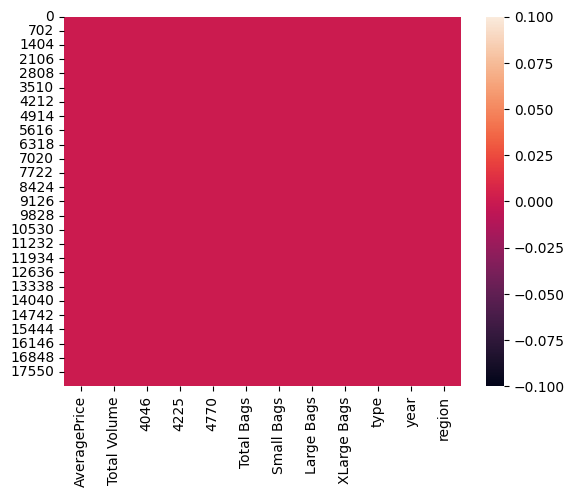

In [ ]:
# Visualize the heat map of null

sns.heatmap(df_avo.isnull())

*no null values found*

In [ ]:
# Conclude the continous numeric aur categorical columns on basis of number of unique values

# Finding the number of unique values in a column

for index in df_avo.columns.to_list():

  print(index,':', df_avo[index].nunique())

AveragePrice : 259
Total Volume : 18237
4046 : 17702
4225 : 18103
4770 : 12071
Total Bags : 18097
Small Bags : 17321
Large Bags : 15082
XLarge Bags : 5588
type : 2
year : 4
region : 54


*Type, Year, Region: Categorical Columns*

*Remaining other columns are continous numeric types*

*Encoding required for Type, Year & Region Columns*

In [ ]:
# Checking statistical Summary

df_avo.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


**APPLYING LABEL ENCODER**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_avo['type'] = le.fit_transform(df_avo['type'])

print(len(le.classes_))

df_avo['year'] = le.fit_transform(df_avo['year'])

print(len(le.classes_))

df_avo['region'] = le.fit_transform(df_avo['region'])

print(len(le.classes_))

df_avo.sample(4)


2
4
54


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15733,0.93,40655.85,9013.96,1885.24,0.0,29756.65,27845.57,1911.08,0.0,1,2,18
12671,2.07,1200.59,117.00,856.14,0.0,227.45,143.33,84.12,0.0,1,1,14
4891,1.29,315955.99,110569.37,156812.81,1306.3,47267.51,45560.08,382.43,1325.0,0,1,40
15916,1.99,67050.78,8078.35,19540.98,0.0,39431.45,39411.01,20.44,0.0,1,2,22


# GRAPHICAL ANALYSIS

**Univariate Analysis**

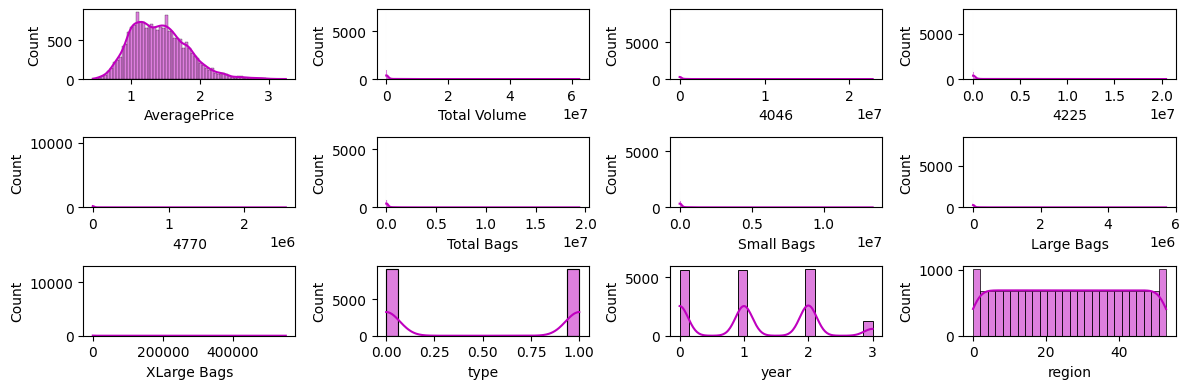

In [ ]:
# Distribution of values in columns

mp.figure(figsize=(12,4))
pnum = 1

for index in df_avo.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.histplot(df_avo[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Few regions are more in count, slighlty imbalanced data, but can be accepted

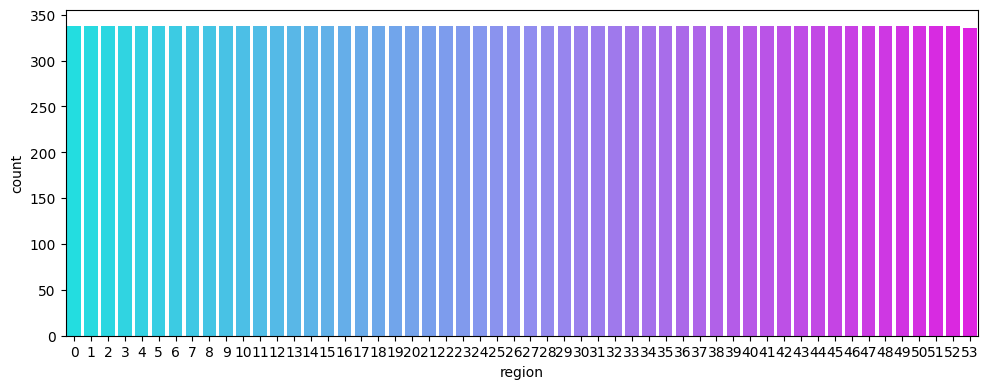

In [ ]:
mp.figure(figsize=(10,4))
sns.countplot(x=df_avo['region'], palette = 'cool')
mp.xlabel('region')
mp.tight_layout()
mp.show()

In [ ]:
df_avo['region'].value_counts().describe()

count     54.000000
mean     337.944444
std        0.408248
min      335.000000
25%      338.000000
50%      338.000000
75%      338.000000
max      338.000000
Name: region, dtype: float64

*All types are nearly close and equal no balancing needed*

*Use box plot to check outliers*

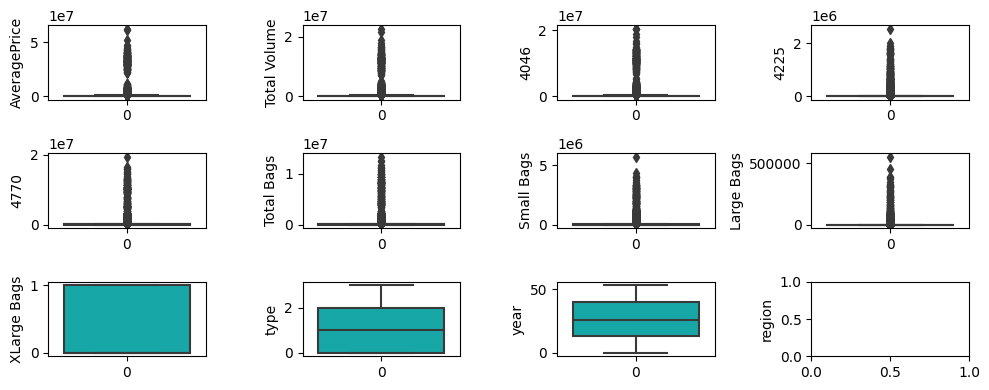

In [ ]:
# Box plot Analysis

mp.figure(figsize=(10,4))
pnum = 1

for index in df_avo.columns.to_list():
  if(pnum<=12):
    sns.boxplot(df_avo[index], color = 'c')
    ax = mp.subplot(3,4,pnum)
    mp.ylabel(index)
  pnum = pnum+1
  mp.tight_layout()

mp.show()

Donot have outliers in categorical data, need further analysis using z-score

(18249, 12)


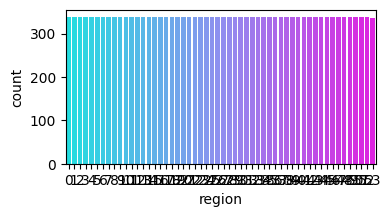

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
13677,1.51,14349.12,7296.89,5158.97,0.00,1893.26,1184.94,708.32,0.0,1,1,33
17964,1.54,14156.63,24.00,760.55,0.00,13372.08,13328.75,43.33,0.0,1,3,30
12056,1.76,16889.91,2206.71,10855.76,367.06,3460.38,3443.56,16.82,0.0,1,1,2


In [ ]:
# Removing Outliers where |Z-score| > 3
# With Region as target

df_avo_ft1 = df_avo[::-1]
df_avo_tg1 = df_avo['region']

df_avo_fil1 = df_avo[(np.abs(sp.zscore(df_avo_ft1)) <= 3).all(axis=1)]

print(df_avo_ft1.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_avo_ft1['region'], palette = 'cool')
mp.show()

df_avo_fil1.sample(3)

In [ ]:
# Removing Outliers where |Z-score| > 3
# With Avg Price as target

df_avo_ft2 = df_avo.iloc[:,1::]
df_avo_tg2 = df_avo['AveragePrice']

df_avo_fil2 = df_avo[(np.abs(sp.zscore(df_avo_ft2)) <= 3).all(axis=1)]

print(df_avo_fil2.shape)

df_avo_fil2.sample(3)

(17782, 12)


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
15156,1.70,8500.37,220.32,3918.45,541.98,3819.62,3466.92,352.70,0.00,1,2,7
851,1.09,247813.45,37089.49,161018.66,402.50,49302.80,48581.44,714.85,6.51,0,0,16
4807,1.06,264253.28,82855.27,92471.42,9386.11,79540.48,69396.45,683.20,9460.83,0,1,38


*Outliers removed when average price was considered as target label*
*Will use df_avo_fil2 for further analysis*


**BI-VARIATE ANALYSIS**

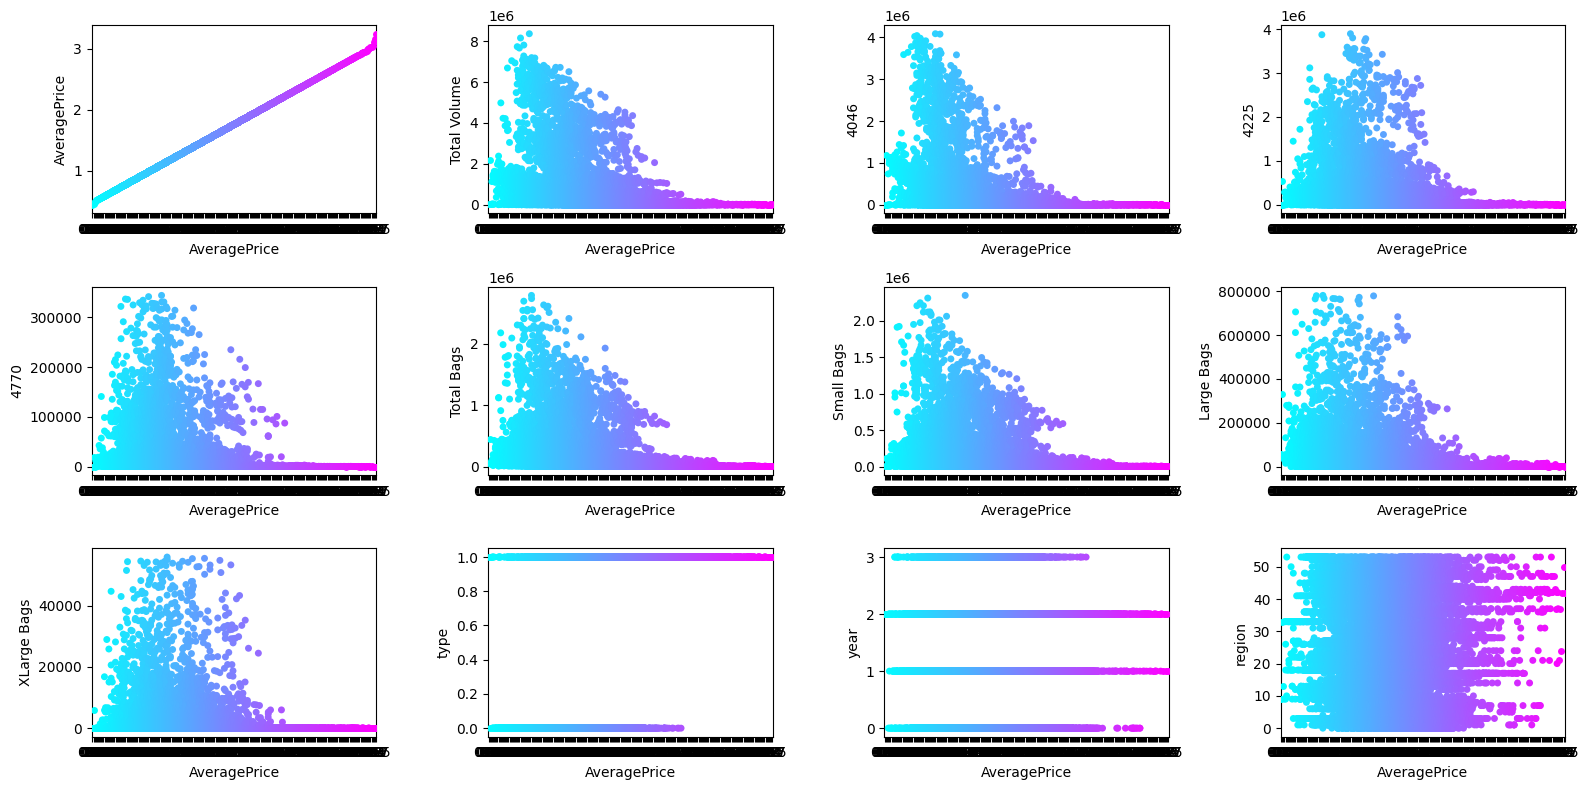

In [ ]:
# Checking stripplot wrt avg price

mp.figure(figsize=(16,8))
pnum = 1

for index in df_avo_fil2.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.stripplot(x=df_avo_fil2['AveragePrice'], y =df_avo_fil2[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Distributions are higher in mid values of Average Price in most of the cases*

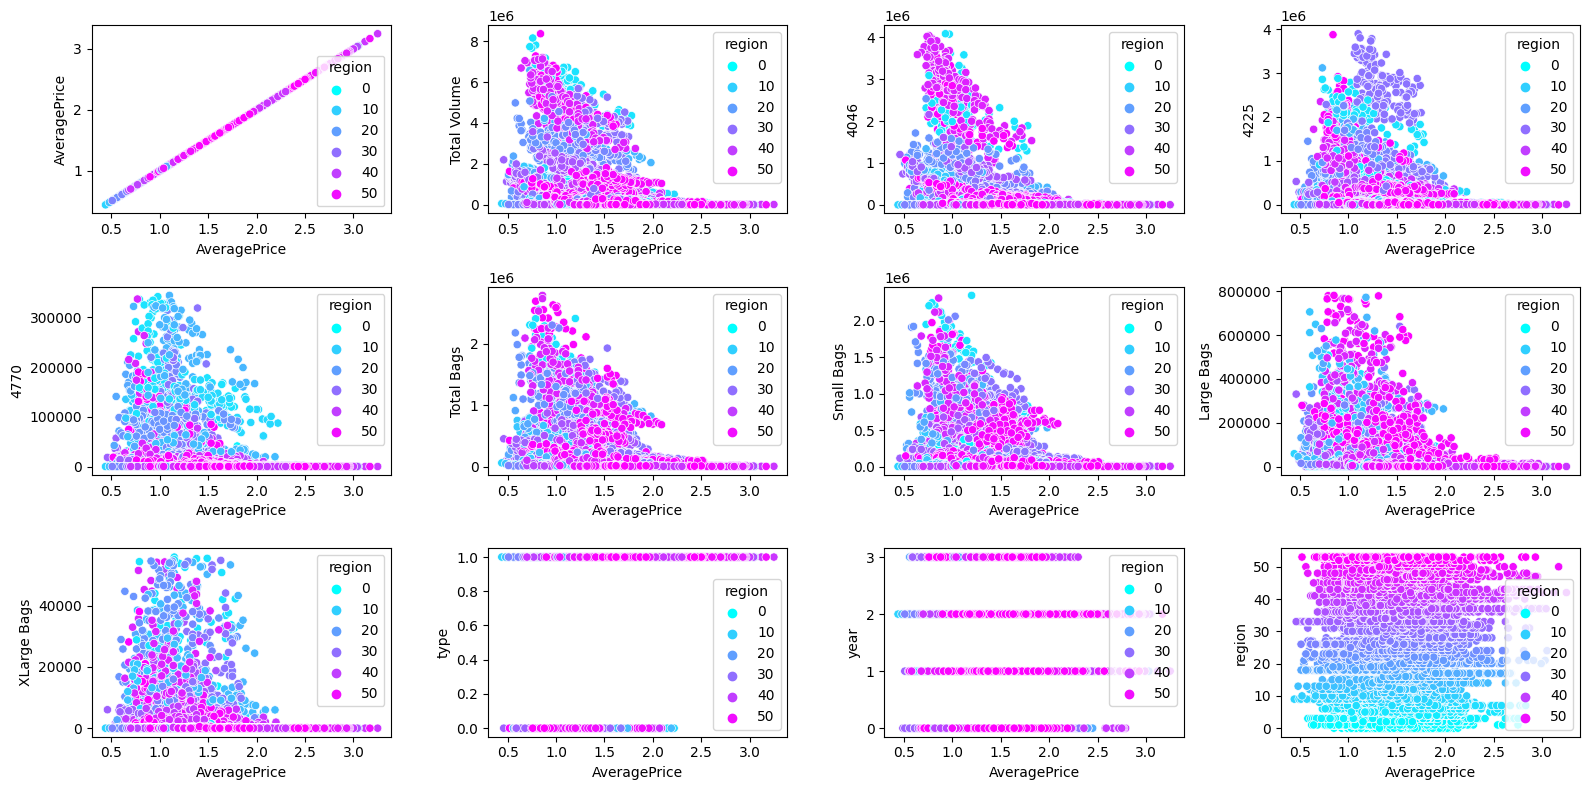

In [ ]:
# Checking scatterplot with respect to average price

mp.figure(figsize=(16,8))
pnum = 1

for index in df_avo_fil2.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.scatterplot(x=df_avo_fil2['AveragePrice'], y =df_avo_fil2[index], palette = 'cool', hue =df_avo_fil2['region'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

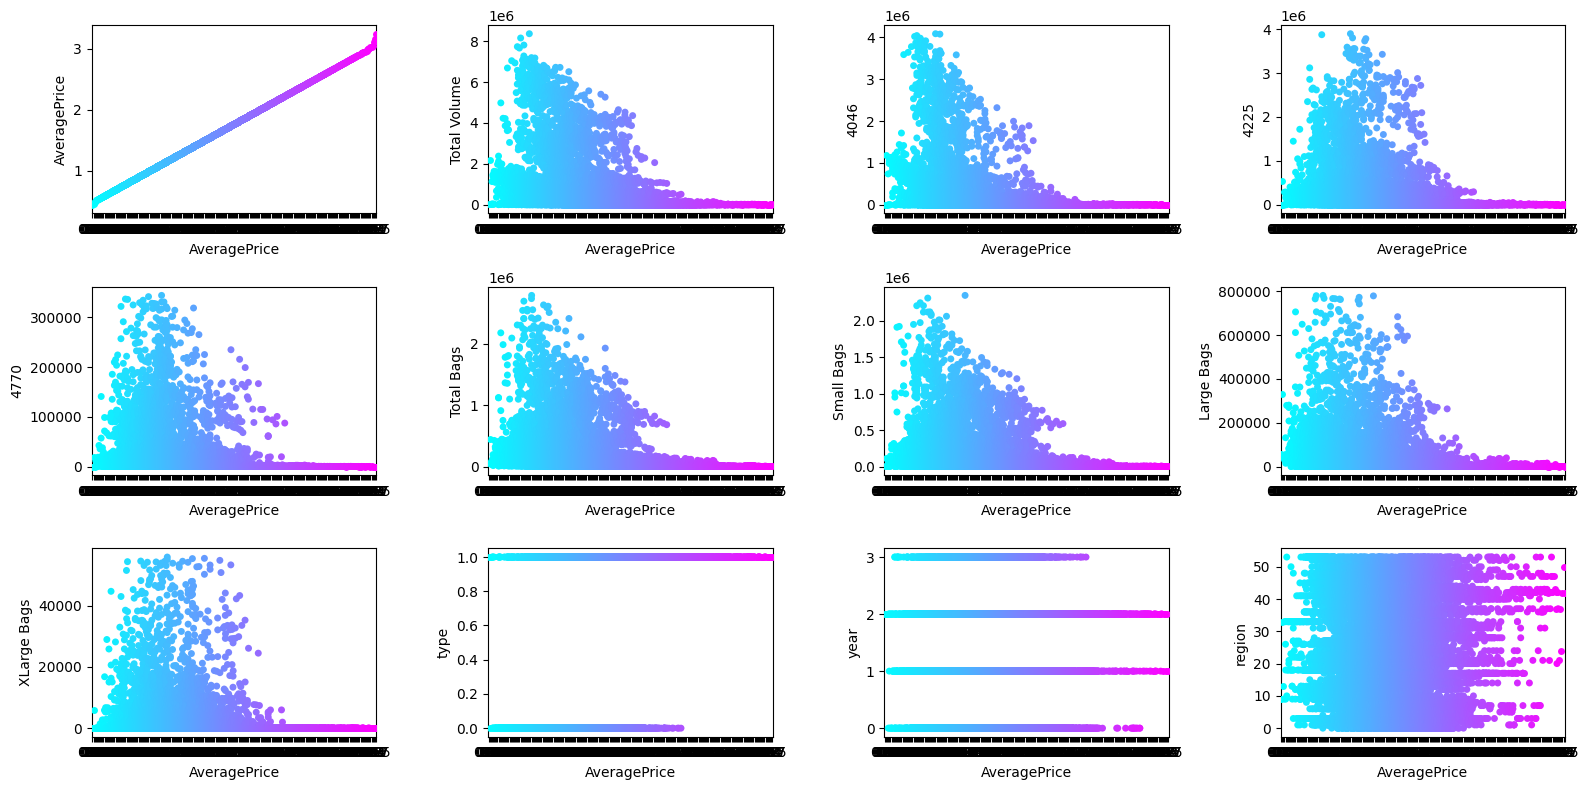

In [ ]:
# Checking stripplot wrt avg price

mp.figure(figsize=(16,8))
pnum = 1

for index in df_avo_fil2.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.stripplot(x=df_avo_fil2['AveragePrice'], y =df_avo_fil2[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Average Price variation with other labels*

**MULTIVARIATE ANALYSIS**

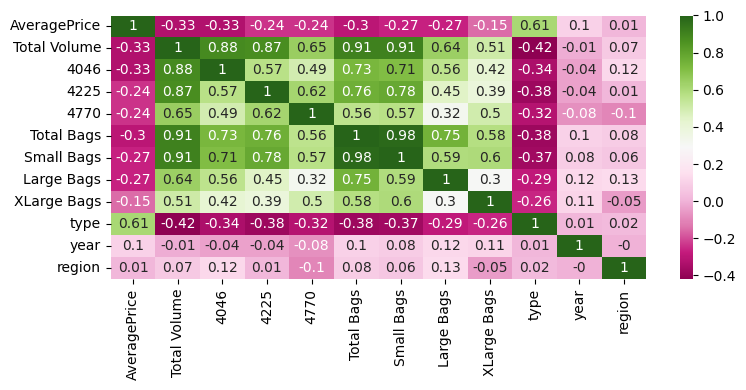

In [ ]:
mp.figure(figsize=(8,4))
sns.heatmap(round(df_avo_fil2.corr(),2), cmap = 'PiYG', annot = True)
mp.tight_layout()
mp.show()

Total Vol, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, Xlarge Bads shows strong +ve correlation among themselves

Avg Price & region are loosely corelated with other labels

**Analysis of Skewness**

In [ ]:
print(df_avo_fil2.skew())
df_avo_fil2.head(2)

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0


*Applying min-max scalar, this will scale the data, remove skewness & std deviation*

In [ ]:
# Apply Min Max scalar to scale the data target label is Avg Price

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Split the Avg Price for scaling

avo_data = df_avo_fil2.iloc[:,1:]
df_av_scl = pd.DataFrame(scaler.fit_transform(avo_data),columns = avo_data.columns.to_list())
df_av_scl['AveragePrice'] = df_avo_fil2['AveragePrice']
print('Skewness')
print('\n')
print(df_av_scl.skew())

Skewness


Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
AveragePrice    0.582598
dtype: float64


*Skewness is reduced for most cases, applying cuberoot transformation where skewness is high*

In [ ]:
# Applying cuberoot transformation where skewness is high and not within acceptable limits <=1, also check std deviation

for index in df_av_scl.columns.to_list():

  if (np.abs(df_av_scl[index].skew()) >1):
    df_av_scl[index] = np.cbrt(df_av_scl[index])


print('Std. Dev')
print('\n')
print(df_av_scl.std())

df_av_scl.shape

Std. Dev


Total Volume    0.188379
4046            0.185930
4225            0.181087
4770            0.191789
Total Bags      0.172632
Small Bags      0.173021
Large Bags      0.184227
XLarge Bags     0.182309
type            0.499844
year            0.313091
region          0.290607
AveragePrice    0.405151
dtype: float64


(17782, 12)

Std Dev is within permissible limits now

In [ ]:
# Check Skewness

df_av_scl.skew()

Total Volume    1.245561
4046            1.564617
4225            1.286719
4770            1.645148
Total Bags      1.237136
Small Bags      1.251353
Large Bags      1.282704
XLarge Bags     2.288933
type           -0.052210
year            0.220792
region          0.005773
AveragePrice    0.582598
dtype: float64

Skewness is reduced can be considered for further analysis

**Checking VIF to handle Multicollinearity**

In [ ]:
# Checking VIF

# Separating Target label Avg Price
df_av_ap = df_av_scl.iloc[:,:-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_av_ap.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_av_ap.values,i) for i in range(len(df_av_ap.columns))]

vif

,Feature,VIF Val
0,Total Volume,541.372554
1,4046,48.720358
2,4225,100.796925
3,4770,5.395074
4,Total Bags,377.575361
5,Small Bags,181.958809
6,Large Bags,18.390335
7,XLarge Bags,2.493276
8,type,2.446108
9,year,3.010371


*VIF is high for Total Volume, Dropping and rechecking*

In [ ]:
# Remove Collinearity by dropping High VIF label , ie, Total Volume

df_av_ap.drop('Total Volume', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_av_ap.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_av_ap.values,i) for i in range(len(df_av_ap.columns))]

vif

,Feature,VIF Val
0,4046,8.626086
1,4225,13.701447
2,4770,5.305489
3,Total Bags,302.217308
4,Small Bags,181.744309
5,Large Bags,18.287505
6,XLarge Bags,2.468365
7,type,2.374379
8,year,2.993934
9,region,3.667655


Also dropping Total Bags

In [ ]:
# Remove Collinearity by dropping High VIF label , ie, Total Bags

df_av_ap.drop('Total Bags', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_av_ap.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_av_ap.values,i) for i in range(len(df_av_ap.columns))]

vif

,Feature,VIF Val
0,4046,8.623944
1,4225,13.062160
2,4770,5.302150
3,Small Bags,19.305540
4,Large Bags,4.490040
5,XLarge Bags,2.448303
6,type,2.275082
7,year,2.938641
8,region,3.647168


Recheck VIF, by dropping Small Bags

In [ ]:
# Remove Collinearity by dropping High VIF label , ie, Small Bags

df_av_ap.drop('Small Bags', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_av_ap.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_av_ap.values,i) for i in range(len(df_av_ap.columns))]

vif

,Feature,VIF Val
0,4046,6.889930
1,4225,8.052310
2,4770,5.288924
3,Large Bags,4.488876
4,XLarge Bags,2.393021
5,type,2.269321
6,year,2.514976
7,region,3.636275


Remaining columns VIF are within permissible limits

# MODELLING

*Regression Modelling to predict Average Price*

*Separarting Target Label & Independent Labels*

In [ ]:
# Separate independent & target labels

x_df_r = df_av_ap
y_df_r = df_avo_fil2['AveragePrice']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(x_df_r.shape)
print(y_df_r.shape)

print(x_df_r.sample(3))
print(y_df_r.sample(3))

(17782, 8)
(17782,)
           4046      4225      4770  Large Bags  XLarge Bags  type      year  \
430    0.162695  0.530638  0.709313    0.161466     0.050930   0.0  0.000000   
734    0.097022  0.335651  0.292325    0.131009     0.245126   0.0  0.000000   
14185  0.219581  0.215774  0.060908    0.444446     0.000000   1.0  0.333333   

         region  
430    0.150943  
734    0.264151  
14185  0.981132  
4856     1.04
15891    1.32
1549     1.34
Name: AveragePrice, dtype: float64


# Model to predict average Price

In [ ]:
# Import Libraries

from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
# Hypertuning various models

ls = Lasso()
rd = Ridge()
en = ElasticNet()

mdl = [ls, rd, en]

param = {"alpha": [0.001, 0.01, 0.1,1,10], "random_state": range(1,100)}

samples = 8
bs_prm = []

for mod in mdl:
  randomCV = RandomizedSearchCV(mod, param_distributions=param, n_iter=samples,cv=5)
  randomCV.fit(x_df_r, y_df_r)
  print(mod, randomCV.best_params_)
  bs_prm.append(randomCV.best_params_)


Lasso() {'random_state': 21, 'alpha': 0.001}
Ridge() {'random_state': 45, 'alpha': 10}
ElasticNet() {'random_state': 84, 'alpha': 0.001}


*Checking Metrics*

In [ ]:
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

min_mse = 999999999999999999999999
bs_prm

[{'random_state': 21, 'alpha': 0.001},
 {'random_state': 45, 'alpha': 10},
 {'random_state': 84, 'alpha': 0.001}]

In [ ]:
# Chekcing Metrics of Lasso

bsp = bs_prm[0]
LS = Lasso(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_r, y_df_r, random_state = i, test_size = 0.2)
  LS.fit(x_train, y_train)
  predict = LS.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  67 mse: 0.08342866026959371 r2_scr: 0.46767327971357797


In [ ]:
# Applying Ridge with hypertuned parameters

bsp = bs_prm[1]
RG = Ridge(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_r, y_df_r, random_state = i, test_size = 0.2)
  RG.fit(x_train, y_train)
  predict = RG.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  67 mse: 0.08289614644442082 r2_scr: 0.4699373984498888


In [ ]:
# Applying ElasticNet with hypertuned parameters

bsp = bs_prm[2]
EN = ElasticNet(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_r, y_df_r, random_state = i, test_size = 0.2)
  EN.fit(x_train, y_train)
  predict = EN.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 0.08289614644442082 r2_scr: 0.46930592180496933


*Checking Random Forest Regressor*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

param = {"criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], "random_state": range(1,100), 'max_features' :['sqrt','log2','None']}

randomCV = RandomizedSearchCV(rfr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_df_r, y_df_r)
print(rfr, randomCV.best_params_)
bs_prm = (randomCV.best_params_)

RandomForestRegressor() {'random_state': 22, 'max_features': 'log2', 'criterion': 'poisson'}


In [ ]:
# Applying RFR with hypertuned parameters

RFR = RandomForestRegressor(random_state = bs_prm['random_state'], max_features = bs_prm['max_features'], criterion = bs_prm['criterion'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_r, y_df_r, random_state = i, test_size = 0.2)
  RFR.fit(x_train, y_train)
  predict = RFR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)


Least MSE at random state =  88 mse: 0.026506996453472022 r2_scr: 0.8240173759882641


XGBOOST

In [ ]:
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

param = {"booster":["gblinear","squarederror"], "objective":["reg:linear", "reg:squarederror"],"verbosity": [0] }

xgr = xg.XGBRegressor()

randomCV = RandomizedSearchCV(xgr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_df_r, y_df_r)
bs_prm = (randomCV.best_params_)

bs_prm

{'verbosity': 0, 'objective': 'reg:squarederror', 'booster': 'gblinear'}

In [ ]:
# Applying XGBoost with hypertuned parameters


XGR = xg.XGBRegressor(objective = bs_prm['objective'], booster = bs_prm['booster'],verbosity = 0)

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_r, y_df_r, random_state = i, test_size = 0.2)
  XGR.fit(x_train, y_train)
  predict = XGR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 0.026506996453472022 r2_scr: 0.46943611376491534


From the analysis it can be concluded that RandomForestRegressor is giving better result with least MSE & better r2Score

Checking CV score

In [ ]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [LS, RG, EN, RFR, XGR]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df_r,y_df_r)
  print(mdl, '\n' ': Avg CV Score is ', cvs.mean(),'\n' )
  cv_score_list.append(cvs.mean())

Lasso(alpha=0.001, random_state=21) 
: Avg CV Score is  0.059643873606694806 

Ridge(alpha=10, random_state=45) 
: Avg CV Score is  0.08236173609559272 

ElasticNet(alpha=0.001, random_state=84) 
: Avg CV Score is  0.07256935693613542 

RandomForestRegressor(criterion='poisson', max_features='log2', random_state=22) 
: Avg CV Score is  0.33056975393385846 

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n

*On basis of MSE & R2 Score, saving the RFR as best Model

In [ ]:
# Saving the best Model

# Import Joblib

import joblib

joblib.dump(RFR, 'avo_ap.pkl')

['avo_ap.pkl']

In [ ]:
# Load the saved model

load_avo_ap = joblib.load('avo_ap.pkl')

avo_ap = load_avo_ap

In [ ]:
# Predictor Function

def pred_avg_pr(input):
  inp = np.array(input)
  pred_ap  =  avo_ap.predict(inp.reshape(1, -1))

  return pred_ap

In [ ]:
# Predictor Function

def inv_scl_avg_pr(inppred_ap):
  inp = np.array(input)
  pred_ap  =  avo_ap.predict(inp.reshape(1, -1))

  return pred_ap

**Verifying the predicted outputs**

In [ ]:
rws = [31, 84, 388, 340, 130]
for row in rws:
  print('Actual:', y_df_r.iloc[row] , 'Predicted by Model:', pred_avg_pr(x_df_r.iloc[row,:]))

Actual: 1.19 Predicted by Model: [1.1802]
Actual: 1.11 Predicted by Model: [1.1099]
Actual: 1.17 Predicted by Model: [1.1658]
Actual: 0.97 Predicted by Model: [0.9724]
Actual: 1.15 Predicted by Model: [1.1673]


In [ ]:
row_num1 = 12487
inp1 = df_avo.iloc[row_num1,[2,3,4,7,8,9,10,11]]
print('Actual:', y_df_r.iloc[row_num1] , 'Predicted by Model:', pred_avg_pr(inp1))

row_num2 = 2136
inp2 = df_avo.iloc[row_num2,[2,3,4,7,8,9,10,11]]
print('Actual:', y_df_r.iloc[row_num2] , 'Predicted by Model:', pred_avg_pr(inp2))

Actual: 1.3 Predicted by Model: [1.1186]
Actual: 0.8 Predicted by Model: [0.8191]


# CLASSIFICATION MODEL FOR PREDICTING THE REGION

In [ ]:
df_avo_fil2.sample(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
4901,1.34,420076.53,135264.64,230423.89,3263.50,51124.50,46655.82,704.79,3763.89,0,1,40
8843,1.35,395298.31,16084.53,297489.92,1168.92,80554.94,39537.13,40374.48,643.33,0,3,30


In [ ]:
# Separating Target Label : region

# Apply Min Max scalar to scale the data target label is Region

avo_data_n = df_avo_fil2.iloc[:,:-1]
df_av_scl_n = pd.DataFrame(scaler.fit_transform(avo_data_n),columns = avo_data_n.columns.to_list())
df_av_scl_n['region'] = df_avo_fil2['region']
print('Skewness')
print('\n')
print(df_av_scl_n.skew())

Skewness


AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.021752
dtype: float64


In [ ]:
# Applying cuberoot transformation where skewness is high and not within acceptable limits <=1, also check std deviation

for index in df_av_scl_n.columns.to_list():

  if (np.abs(df_av_scl_n[index].skew()) >1):
    df_av_scl_n[index] = np.cbrt(df_av_scl_n[index])


print('Std. Dev')
print('\n')
print(df_av_scl_n.std())

df_av_scl_n.shape

Std. Dev


AveragePrice     0.143159
Total Volume     0.188379
4046             0.185930
4225             0.181087
4770             0.191789
Total Bags       0.172632
Small Bags       0.173021
Large Bags       0.184227
XLarge Bags      0.182309
type             0.499844
year             0.313091
region          15.443563
dtype: float64


(17782, 12)

In [ ]:
df_av_scl_n.skew()

AveragePrice    0.560969
Total Volume    1.245561
4046            1.564617
4225            1.286719
4770            1.645148
Total Bags      1.237136
Small Bags      1.251353
Large Bags      1.282704
XLarge Bags     2.288933
type           -0.052210
year            0.220792
region          0.021752
dtype: float64

In [ ]:
# Checking VIF

# Separating Target label Region
df_av_reg = df_av_scl_n.iloc[:,:-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_av_reg.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_av_reg.values,i) for i in range(len(df_av_reg.columns))]

vif

,Feature,VIF Val
0,AveragePrice,8.143207
1,Total Volume,542.412985
2,4046,48.004262
3,4225,101.118039
4,4770,5.373392
5,Total Bags,376.249407
6,Small Bags,181.637324
7,Large Bags,18.411086
8,XLarge Bags,2.462990
9,type,5.154900


Drop Total Volume having high VIF

In [ ]:
# Remove Collinearity by dropping High VIF label , ie, Total Volume

df_av_reg.drop('Total Volume', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_av_reg.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_av_reg.values,i) for i in range(len(df_av_reg.columns))]

vif

,Feature,VIF Val
0,AveragePrice,8.120863
1,4046,8.118734
2,4225,15.232352
3,4770,5.280822
4,Total Bags,300.866998
5,Small Bags,181.420547
6,Large Bags,18.321447
7,XLarge Bags,2.438784
8,type,5.132243
9,year,3.310982


Drop Total Bags having high VIF

In [ ]:
# Remove Collinearity by dropping High VIF label , ie, Total Bags

df_av_reg.drop('Total Bags', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_av_reg.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_av_reg.values,i) for i in range(len(df_av_reg.columns))]

vif

,Feature,VIF Val
0,AveragePrice,8.111745
1,4046,8.108509
2,4225,14.486551
3,4770,5.278699
4,Small Bags,19.247891
5,Large Bags,4.657746
6,XLarge Bags,2.421819
7,type,4.944127
8,year,3.239313


Drop Small Bags having high VIF

In [ ]:
# Remove Collinearity by dropping High VIF label , ie, Small Bags

df_av_reg.drop('Small Bags', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_av_reg.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_av_reg.values,i) for i in range(len(df_av_reg.columns))]

vif

,Feature,VIF Val
0,AveragePrice,8.111741
1,4046,6.264054
2,4225,9.385418
3,4770,5.267294
4,Large Bags,4.656343
5,XLarge Bags,2.370678
6,type,4.930298
7,year,2.801739


Remaining Labels are within Acceptable Limits

# *Classification Models to predict region accurately*

In [ ]:
# Split features and target labels

x_df_c = df_av_reg

y_df_c = df_avo_fil2['region']

print(x_df_c.shape, y_df_c.shape)

print(y_df_c.sample(2))

x_df_c.head(2)

(17782, 8) (17782,)
4905     40
16662    36
Name: region, dtype: int64


,AveragePrice,4046,4225,4770,Large Bags,XLarge Bags,type,year
0,0.316726,0.063309,0.240908,0.051900,0.049232,0.0,0.0,0.0
1,0.323843,0.054851,0.225463,0.055323,0.049967,0.0,0.0,0.0


#**Random Forest Classifier**

Hypertuning parameters in random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df_c, y_df_c)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_split': 2, 'random_state': 27}


In [ ]:
# Training the RFC Model with given best hypertuning parameters

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_c, y_df_c, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)


Best Random State: 63 with accuracy score: 0.8861400056227158


**Max accuracy: Random Forest Clfr : 0.8861**

Hypertuning Parameters ExtraTreeClassifier

In [ ]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df_c, y_df_c)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 13, 'min_samples_split': 5, 'random_state': 21}


In [ ]:
# Training the ETC  Model with given best hypertuning parameters
ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_c, y_df_c, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 96 with accuracy score: 0.7528816418330053


**Max accuracy: Extra Tress Clfr : 0.7529**

Hypertuning DTC Parameters

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df_c, y_df_c)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 11, 'min_samples_split': 6, 'random_state': 88}


In [ ]:
# Training the DTC  Model with given best hypertuning parameters
DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'], min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
max_rand_st = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_c, y_df_c, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 24 with accuracy score: 0.7734045543997751


**max accuracy: Decision Tree Clfr : 0.7734**

Hypertuning KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df_c, y_df_c)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 5}


In [ ]:
# Training KNN Model

max_acc = 0
max_rand_st = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_c, y_df_c, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 17 with accuracy score: 0.8344110205229126


**Max Acc KNN = 0.8344**

Hypertuning SVC Model

In [ ]:
from sklearn.svm import SVC

svc = SVC()
param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

samples = 8
randomCV = RandomizedSearchCV(svc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df_c, y_df_c)
print(randomCV.best_params_)

bp_svc = randomCV.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [ ]:
# Training SVC Model

max_acc = 0
max_rand_st = 0
SV = SVC(C = bp_svc['C'], kernel = bp_svc['kernel'], gamma = bp_svc['gamma'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_c, y_df_c, random_state = i, test_size = 0.2)

  SV.fit(x_train, y_train)
  pred = SV.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 79 with accuracy score: 0.7087433230250211


**Max acc SVC : 0.7087**

Hypertuning ADABOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df_c, y_df_c)
print(randomCV.best_params_)

bp_abc = randomCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 2, 'n_estimators': 65, 'random_state': 51}


In [ ]:
# Training ABC Model

max_acc = 0
max_rand_st = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df_c, y_df_c, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    max_rand_st = i

print('Best Random State:', max_rand_st, 'with accuracy score:', max_acc)

Best Random State: 9 with accuracy score: 0.1748664605004217


**Max Accuracy Adaboost Classifier: 0. 1749**


In [ ]:
# Checking CV Score

from sklearn.model_selection import cross_val_score

cv = 5
model_list = [RFC, ETC, KNN, SV, ABC]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df_c,y_df_c)
  print(mdl, ': Avg CV Score is ', round(cvs.mean(),2))
  print('\n')

RandomForestClassifier(max_features=2, random_state=27) : Avg CV Score is  0.64


ExtraTreeClassifier(max_features=13, min_samples_split=5, random_state=21) : Avg CV Score is  0.5


KNeighborsClassifier(p=1, weights='distance') : Avg CV Score is  0.47


SVC(C=100, gamma=0.1) : Avg CV Score is  0.52


AdaBoostClassifier(learning_rate=2, n_estimators=65, random_state=51) : Avg CV Score is  0.06




#*Max Accuracy & Avg CV Score suggests using Random Forest Classifier*

**Checking accuracy, score, confusion matrix & classsification reports**

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

RFC_SEL = RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])

x_train, x_test, y_train, y_test = train_test_split(x_df_c, y_df_c, random_state = 63, test_size = 0.2)
RFC_SEL.fit(x_train, y_train)
pred = RFC_SEL.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')

Accuracy of the Model: 0.8861


Confusion Matrix: 
 [[54  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  0]
 [ 0  0 80 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 45  0]
 [ 0  1  0 ...  0  0 53]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.78      0.76        69
           1       0.81      0.87      0.83        67
           2       0.98      0.99      0.98        81
           3       0.95      0.87      0.91        67
           4       0.79      0.86      0.82        63
           5       0.81      0.81      0.81        63
           6       1.00      1.00      1.00        50
           7       0.95      0.95      0.95        83
           8       0.97      0.98      0.98        65
           9       0.88      0.92      0.90        72
          10       0.86      0.86      0.86        76
          11       0.96      0.96      0.96        71
          12       0.94      0.95      0.94        79
        

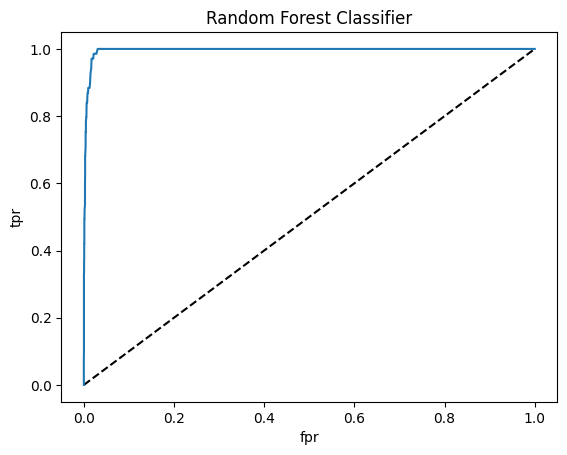

In [ ]:
# Checking ROC_AUC Curve

# Checking AUC & ROC

y_pred_prob = RFC_SEL.predict_proba(x_test)[:, 0]

# 0 & others

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 0)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Random Forest Classifier')
mp.plot(fpr,tpr)
mp.show()

# Saving the Best Model

In [ ]:
import joblib

joblib.dump(RFC_SEL, 'RFC_AV_REG.pkl')

['RFC_AV_REG.pkl']

In [ ]:
# Load the saved model

load_RFC_REG = joblib.load('RFC_AV_REG.pkl')

R_AV_RG = load_RFC_REG

In [ ]:
# Function to Predict Region

def pred_reg(input):
  inp = np.array(input)
  type_reg  =  R_AV_RG.predict(inp.reshape(1, -1))
  reg_code = le.inverse_transform(type_reg)
  pred_lst = [type_reg, reg_code]

  return pred_lst

In [ ]:
# Checking Prediction

rws = [59, 24, 142, 167, 65]
for row in rws:
  print('Actual:', y_df_c[row])
  print('Predicted by Model:', pred_reg(x_df_c.iloc[row,:])[0])
  print('Decoded value:', pred_reg(x_df_c.iloc[row,:])[1])
  print('\n')


Actual: 1
Predicted by Model: [1]
Decoded value: ['Atlanta']


Actual: 0
Predicted by Model: [0]
Decoded value: ['Albany']


Actual: 2
Predicted by Model: [2]
Decoded value: ['BaltimoreWashington']


Actual: 3
Predicted by Model: [3]
Decoded value: ['Boise']


Actual: 1
Predicted by Model: [1]
Decoded value: ['Atlanta']




**Regression Model & Classification Model seems to be working & predicting fine**